<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_4/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install sklearn
%pip install matplotlib

In [2]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split

In [3]:
# using Google Drive
drive.mount('/d')
file_path = '/d/My Drive/Colab Notebooks/DL-tutorial/data/wine.csv'

df = pd.read_csv(file_path, header=None)
df.head(3)

Drive already mounted at /d; to attempt to forcibly remount, call drive.mount("/d", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [4]:
x = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True) # 8:2=train:test

In [5]:
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 635 (2.48 KB)
Trainable params: 635 (2.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
"""
 general way
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.25, verbose=1) # validation sets = train sets * 0.25

'\n general way\n'

In [12]:
score = model.evaluate(x_test, y_test)
print(score)

41/41 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9869
[0.05327576398849487, 0.986923098564148]


In [6]:
"""
 using checkpoint
"""
model_path = "/d/My Drive/Colab Notebooks/DL-tutorial/models/wine/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, verbose=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=checkpointer)


Epoch 1: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/01-0.8238.hdf5

Epoch 2: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/02-0.8723.hdf5

Epoch 3: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/03-0.9323.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/04-0.9300.hdf5

Epoch 5: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/05-0.9369.hdf5

Epoch 6: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/06-0.9362.hdf5

Epoch 7: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/07-0.9369.hdf5

Epoch 8: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/08-0.9385.hdf5

Epoch 9: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/09-0.9385.hdf5

Epoch 10: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/10-0.9415.hdf5

Epoch 11: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/11-0.9400.hdf5

Epoch 12: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/12-0.9423.hdf5

Epoch 13: saving model to /d/My Drive/Colab Notebooks/DL-tutorial/models/wine/13-0.9415.hdf5

Epoch 14: saving model to /d/My Drive/Colab Notebooks/DL-tutorial

In [11]:
# checking overfitting using graph
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.521301,0.815756,0.360346,0.823846
1,0.328544,0.841160,0.293443,0.872308
2,0.264249,0.902489,0.237052,0.932308
3,0.219241,0.926354,0.218596,0.930000
4,0.206442,0.930973,0.207963,0.936923
...,...,...,...,...
1995,0.033370,0.988709,0.060645,0.983077
1996,0.029619,0.991532,0.066672,0.980000
1997,0.029772,0.989736,0.075199,0.976923
1998,0.031959,0.989736,0.070690,0.977692


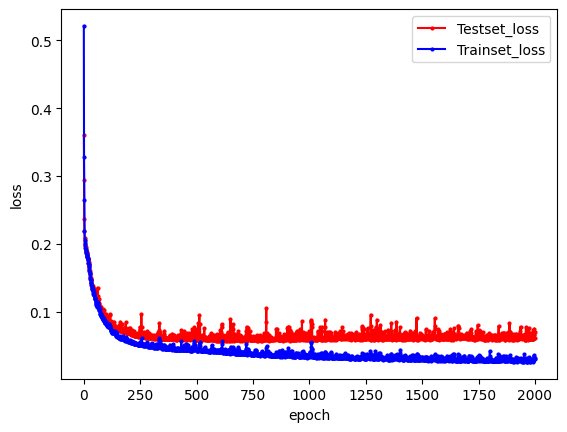

In [12]:
v_loss = hist_df['val_loss']
loss = hist_df['loss']

hist_df_len = np.arange(len(loss)) # make array [0, 1, 2, .... 1999, 2000]

plt.plot(hist_df_len, v_loss, marker="o", c="red", markersize=2, label='Testset_loss')
plt.plot(hist_df_len, loss, marker="o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
"""
 using early stopping checkpoint
"""
model_path = "/d/My Drive/Colab Notebooks/DL-tutorial/models/wine/best_model.hdf5"
early_stopping_checkpointer = EarlyStopping(monitor='val_loss', patience=20) # watching 'var_loss' and wait for improve 20 times
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_only_best=True) # change to save only the best result of 'var_loss'

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=250, batch_size=100, validation_split=0.25, verbose=1, callbacks=[early_stopping_checkpointer, checkpointer])

Epoch 1/250
39/39 [==============================] - 1s 13ms/step - loss: 0.0525 - accuracy: 0.9828 - val_loss: 0.0460 - val_accuracy: 0.9885
Epoch 2/250


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9831 - val_loss: 0.0475 - val_accuracy: 0.9892
Epoch 3/250
39/39 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9856 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 4/250
39/39 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0467 - val_accuracy: 0.9885
Epoch 5/250
39/39 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9879 - val_loss: 0.0521 - val_accuracy: 0.9885
Epoch 6/250
39/39 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0466 - val_accuracy: 0.9900
Epoch 7/250
39/39 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.9861 - val_loss: 0.0458 - val_accuracy: 0.9885
Epoch 8/250
39/39 [==============================] - 0s 6ms/step - loss: 0.0472 - accuracy: 0.9867 - val_loss: 0.0470 - val_accuracy: 0.9892
Epoch 9/250
39/39 [======

In [8]:
score = model.evaluate(x_test, y_test)
print(score)

41/41 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9754
[0.06169675290584564, 0.9753845930099487]
